In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib as plt 

## # Data Prep 

- Gathered browns' most recent schedule and game results data from Pro football referece .com on Dec 21 
- Downloaded last 3 full seasons from 2019 to 2021 and partial season for 2022 which only includes first 16 regular season games 
- Combine games into one excel document 
- remove bye weeks 
- Deleted data corresponding to expected points, because this is an engineered feature 
- Rename columns under categories score, offense and defense and expected points 
    - tm to points scored, opp to points allowed 
    - 1st downs gained
    - pass yards gained 
    - rush yards gained 
    - turnovers 
    
    Defense 
    - first downs allowed 
    - total yards allowed 
    - pass yards allowed 
    - rush yards allowed 
    - forced turnovers 
 - Including playoff games in record because goal is to predict browns ability to win a game regardless of whether it is regular season or post season 
 
- delete first row of data (score, offense, defense should be removed) 
- updated dates to reflect year game was played


In [2]:
df = pd.read_excel('consolidated record.xls')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 22 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Week        65 non-null     int64         
 1   Day         65 non-null     object        
 2   Date        65 non-null     datetime64[ns]
 3   Unnamed: 3  65 non-null     object        
 4   Unnamed: 4  65 non-null     object        
 5   Unnamed: 5  65 non-null     object        
 6   OT          1 non-null      object        
 7   Rec         65 non-null     object        
 8   Location    33 non-null     object        
 9   Opp         65 non-null     object        
 10  tm          65 non-null     int64         
 11  Opp.1       65 non-null     int64         
 12  1stD o      65 non-null     int64         
 13  TotYd o     65 non-null     int64         
 14  PassY o     65 non-null     int64         
 15  RushY o     65 non-null     int64         
 16  TO o        47 non-null     

In [4]:
# drop columns don't want: OT, Rec, Week, Unnamed: 3, 4
# dropping columns 
df = df.drop(columns= ['Week','Day','Date','Unnamed: 3','Unnamed: 4','OT','Rec'])



In [5]:
 df.columns = [column.replace(' ','_').lower() for column in df]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   unnamed:_5  65 non-null     object 
 1   location    33 non-null     object 
 2   opp         65 non-null     object 
 3   tm          65 non-null     int64  
 4   opp.1       65 non-null     int64  
 5   1std_o      65 non-null     int64  
 6   totyd_o_    65 non-null     int64  
 7   passy_o_    65 non-null     int64  
 8   rushy_o_    65 non-null     int64  
 9   to_o_       47 non-null     float64
 10  1std_d_     65 non-null     int64  
 11  totyd_d_    65 non-null     int64  
 12  passy_d_    65 non-null     int64  
 13  rushy_d_    65 non-null     int64  
 14  to_d_       43 non-null     float64
dtypes: float64(2), int64(10), object(3)
memory usage: 7.7+ KB


In [7]:
# renaming column names to more readable format
df = df.rename(columns = {'unnamed:_5':'result', 'opp':'opponent',
                              'opp.1':'points_allowed', 
                              'tm':'points_scored',
                              '1std_o':'first_downs_gained', 'totyd_o_':'total_yards_gained',
                              'passy_o_':'pass_yards_gained',
                              'rushy_o_':'rush_yards_gained','to_o_':'turnovers','1std_d_':'first_downs_allowed',
                              'totyd_d_':'total_yards_allowed',
                              'passy_d_':'pass_yards_allowed','rushy_d_':'rush_yards_allowed',
                              'to_d_':'turnovers_forced',})

In [8]:
# cleaned column names
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   result               65 non-null     object 
 1   location             33 non-null     object 
 2   opponent             65 non-null     object 
 3   points_scored        65 non-null     int64  
 4   points_allowed       65 non-null     int64  
 5   first_downs_gained   65 non-null     int64  
 6   total_yards_gained   65 non-null     int64  
 7   pass_yards_gained    65 non-null     int64  
 8   rush_yards_gained    65 non-null     int64  
 9   turnovers            47 non-null     float64
 10  first_downs_allowed  65 non-null     int64  
 11  total_yards_allowed  65 non-null     int64  
 12  pass_yards_allowed   65 non-null     int64  
 13  rush_yards_allowed   65 non-null     int64  
 14  turnovers_forced     43 non-null     float64
dtypes: float64(2), int64(10), object(3)
memory

## Address nulls 
- location 
- turnovers 
- turnovers forced 

null in turnovervs and turnovers forced can be replaced with 0 
null for location means home game 

In [9]:
# fill all nans with zero value 
df = df.fillna(0)

In [10]:
# no more nulls 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   result               65 non-null     object 
 1   location             65 non-null     object 
 2   opponent             65 non-null     object 
 3   points_scored        65 non-null     int64  
 4   points_allowed       65 non-null     int64  
 5   first_downs_gained   65 non-null     int64  
 6   total_yards_gained   65 non-null     int64  
 7   pass_yards_gained    65 non-null     int64  
 8   rush_yards_gained    65 non-null     int64  
 9   turnovers            65 non-null     float64
 10  first_downs_allowed  65 non-null     int64  
 11  total_yards_allowed  65 non-null     int64  
 12  pass_yards_allowed   65 non-null     int64  
 13  rush_yards_allowed   65 non-null     int64  
 14  turnovers_forced     65 non-null     float64
dtypes: float64(2), int64(10), object(3)
memory

In [11]:
# replace zeros in location with word home and replace @ symbol with away 


df['location'] = df['location'].replace([0, '@'], ['home', 'away',])


In [16]:
df.shape
#65 observations with 15 columns 

(65, 15)

In [19]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
points_scored,65.0,22.615385,10.929736,3.0,14.0,22.0,29.0,49.0
points_allowed,65.0,24.123077,11.009240,3.0,16.0,23.0,32.0,47.0
first_downs_gained,65.0,20.676923,4.870535,9.0,17.0,21.0,24.0,33.0
total_yards_gained,65.0,352.830769,77.791301,180.0,300.0,355.0,398.0,531.0
pass_yards_gained,65.0,213.276923,61.924982,78.0,171.0,205.0,254.0,355.0
rush_yards_gained,65.0,139.553846,54.467889,40.0,99.0,138.0,182.0,307.0
turnovers,65.0,1.323077,1.147112,0.0,0.0,1.0,2.0,4.0
first_downs_allowed,65.0,20.876923,5.619463,6.0,17.0,20.0,24.0,35.0
total_yards_allowed,65.0,347.707692,89.621901,47.0,302.0,339.0,397.0,566.0
pass_yards_allowed,65.0,224.892308,85.946408,1.0,182.0,216.0,268.0,501.0


<AxesSubplot:xlabel='result', ylabel='Count'>

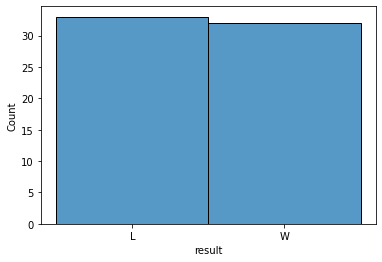

In [20]:
# how many games have the browns won in their last 65 contests? 

sns.histplot(data=df, x="result")


<AxesSubplot:xlabel='result', ylabel='count'>

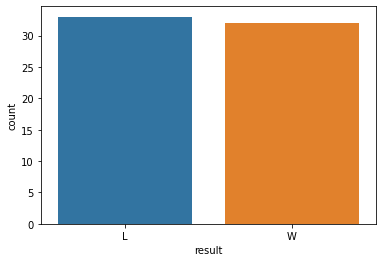

In [21]:
# count plot 
sns.countplot(x=df["result"])



### takeaways
- browns lose more than they win 
- Baseline model would be browns lose every game and would be right 

In [ ]:
# split data, complete exploration of variables 